In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/andy_home.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1473 non-null   int64 
 1   Chan_0_2   1473 non-null   int64 
 2   Chan_1_2   1473 non-null   int64 
 3   timestamp  1473 non-null   object
dtypes: int64(3), object(1)
memory usage: 46.2+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0            6         4        11   Sun Mar 26 14:39:12 2023
1            7         3        14   Sun Mar 26 14:40:12 2023
2            4         3        12   Sun Mar 26 14:41:12 2023
3            6         2        14   Sun Mar 26 14:42:12 2023
4            5         9        15   Sun Mar 26 14:43:12 2023
...        ...       ...       ...                        ...
1468        90        90       122   Mon Mar 27 14:36:06 2023
1469       126       119       171   Mon Mar 27 14:37:06 2023
1470       109       107   

In [3]:
df_morn.dropna(inplace=True)

In [4]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1473 non-null   int64 
 1   Chan_0_2   1473 non-null   int64 
 2   Chan_1_2   1473 non-null   int64 
 3   timestamp  1473 non-null   object
dtypes: int64(3), object(1)
memory usage: 46.2+ KB


In [5]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,6,4,11,2023-03-26 14:39:12
1,7,3,14,2023-03-26 14:40:12
2,4,3,12,2023-03-26 14:41:12
3,6,2,14,2023-03-26 14:42:12
4,5,9,15,2023-03-26 14:43:12


In [6]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,6,4,11,2023-03-26 14:39:12
1,7,3,14,2023-03-26 14:40:12
2,4,3,12,2023-03-26 14:41:12
3,6,2,14,2023-03-26 14:42:12
4,5,9,15,2023-03-26 14:43:12


In [7]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [8]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1472
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1473 non-null   datetime64[ns]
 1   Chan_0_1   1473 non-null   int64         
 2   Chan_0_2   1473 non-null   int64         
 3   Chan_1_2   1473 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 57.5 KB


In [9]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-26 14:00:00,27.619048,24.142857,79.190476
2023-03-26 15:00:00,53.233333,48.150000,131.433333
2023-03-26 16:00:00,61.250000,55.000000,135.616667
2023-03-26 17:00:00,56.000000,49.550000,132.516667
2023-03-26 18:00:00,58.100000,51.450000,139.366667


In [10]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

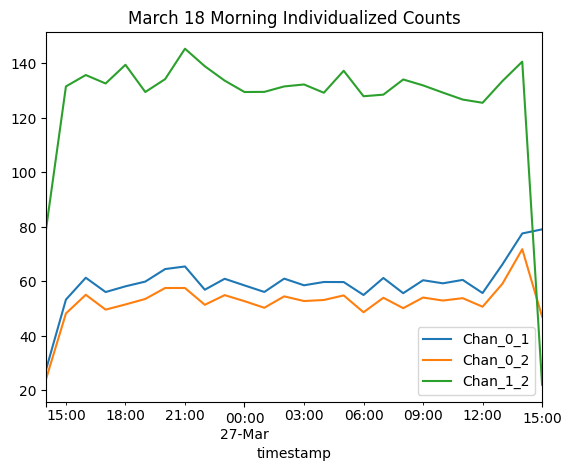

In [11]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [12]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-26 14:00:00,27.619048,24.142857,79.190476,43.650794
2023-03-26 15:00:00,53.233333,48.150000,131.433333,77.605556
2023-03-26 16:00:00,61.250000,55.000000,135.616667,83.955556
2023-03-26 17:00:00,56.000000,49.550000,132.516667,79.355556
2023-03-26 18:00:00,58.100000,51.450000,139.366667,82.972222


(0.0, 150.0)

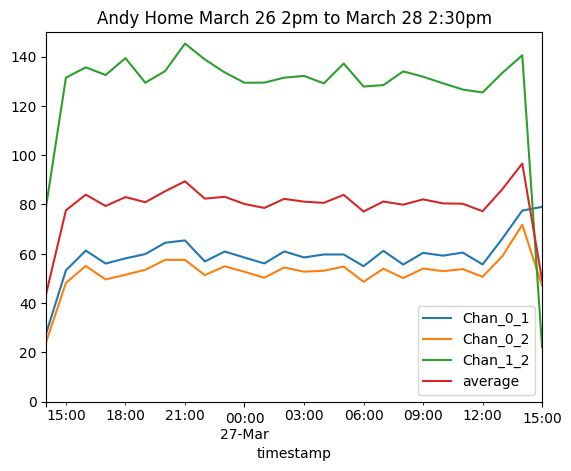

In [13]:
df_morn_counts.plot()
plt.title('Andy Home March 26 2pm to March 28 2:30pm')
plt.ylim(0, 150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

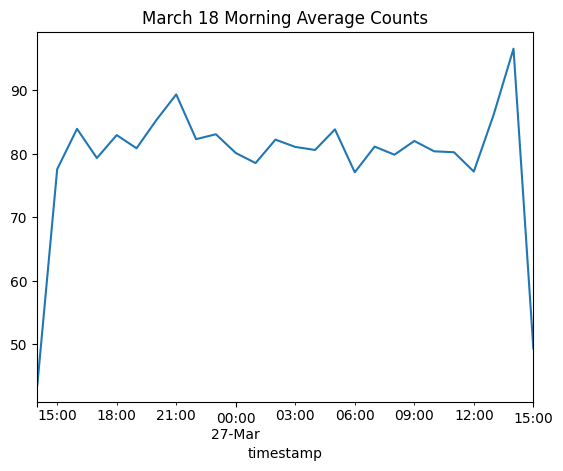

In [14]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')